# TEST - Claro loop + fit

In [1]:
from claro_fit import *

In [2]:
a = fileinfo('C:\\Users\\MARTINA\\Desktop\\secondolotto_1\\', custom_n_files='all')

The default subfolders' paths are *Station_1__*\Station_1__??_Summary\Chip_???\S_curve.
The default file names are Ch_*_offset_*_Chip_*.txt.
To confirm, press Enter. Press any other key to change the paths.
 


ValueError: Bad data in: C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_218\S_curve\Ch_2_offset_0_Chip_218.txt. First line: Troppi datia. Going on...
ValueError: Bad data in: C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_219\S_curve\Ch_2_offset_0_Chip_219.txt. First line: Troppi dati
ValueError: Bad data in: C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_241\S_curve\Ch_1_offset_0_Chip_241.txt. First line: Troppi datia. Going on...
ValueError: Bad data in: C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_247\S_curve\Ch_0_offset_0_Chip_247.txt. First line: Troppi dati
ValueError: Bad data in: C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_251\S_curve\Ch_0_offset_0_Chip_251.txt. First line: Troppi datia. Going on...
ValueError: Bad data in: C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_25

In [3]:
# fileinfo_find(a, chip='002', ch='1')

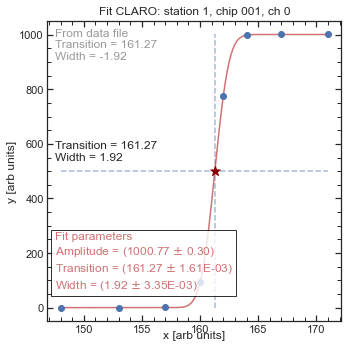

In [4]:
counter = 0
for file in a.values(): # file is the sub-dict, access keys via file['key']
    counter += 1
    x,y,meta = read_data(file['path'])
    metafit = fit_erf(x,y,meta, interactive=False, log=False)
    plot_fit(x, y, metafit, fileinfo=file, show=True, save=False, log=False)
    break